In [2]:
import pandas as pd


df = pd.read_csv("Telco-Customer-Churn.csv")
print(df.head())
print(df.isnull().sum())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
from sklearn.preprocessing import LabelEncoder


df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [5]:
df_probs = X_test.copy()
df_probs['Churn_Prob'] = model.predict_proba(X_test)[:, 1]
df_probs.to_csv("churn_probabilities.csv", index=False)


In [6]:
import numpy as np


df_probs['Churn_Level'] = np.where(df_probs['Churn_Prob'] > 0.5, 'High Risk', 'Low Risk')


df_probs[['customerID', 'Churn_Prob', 'Churn_Level']].head()


,customerID,Churn_Prob,Churn_Level
185,692,0.68,High Risk
2715,325,0.14,Low Risk
3825,2527,0.00,Low Risk
1807,4911,0.64,High Risk
132,6058,0.08,Low Risk


In [7]:
df_probs.to_csv("churn_probabilities.csv", index=False)


In [8]:


df['Churn_Prob'] = model.predict_proba(X)[:, 1]


df.to_csv('churn_predictions.csv', index=False)

print("✅ churn_predictions.csv exported successfully!")


✅ churn_predictions.csv exported successfully!


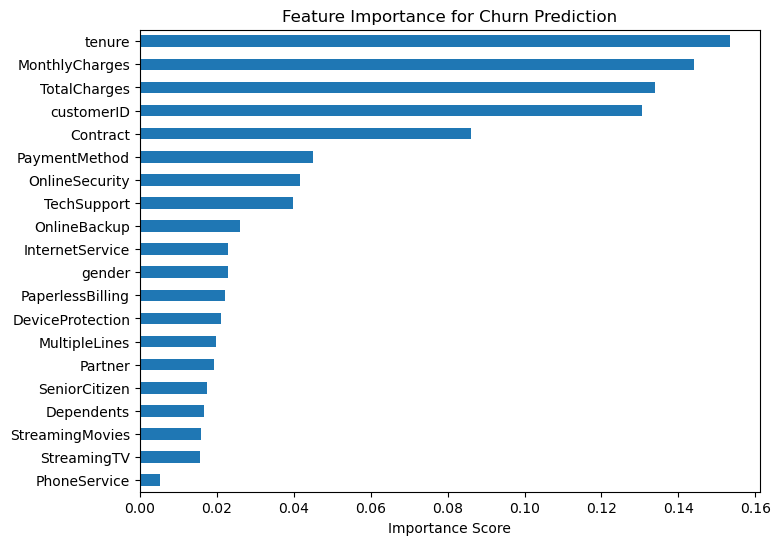

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importance = model.feature_importances_
features = pd.Series(importance, index=X_train.columns).sort_values()

# Plot (horizontal bar chart)
features.plot(kind='barh', figsize=(8,6))
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Importance Score')
plt.show()

# Save to CSV for Power BI
features.reset_index().rename(columns={"index":"Feature",0:"Importance"}).to_csv('feature_importance.csv', index=False)


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

